<strong><b><font size="5">Data Science Academy</font></b></strong>

<strong><b><font size="5">Web Scraping e Análise de Dados</font></b></strong>

<strong><b><font size="5">Lab 3</font></b></strong>

<strong><b><font size="4">Data Science no Esporte - Web Scraping e Análise Estatística em Dados da NBA</font></b></strong>

![title](imagens/lab3.png)

## Definição do Problema

A Ciência de Dados está em todos os lugares. Se há dados disponíveis, podemos extrair, analisar e gerar insights poderosos. E no esporte não seria diferente.

Cada vez mais gestores de todos os esportes descobrem os benefícios e vantagem competitiva em usar análise de dados para compreender o comportamento dos atletas, melhorar o desempenho, unir atletas com características complementares no mesmo time e muito mais.

Neste Lab, vamos extrair dados reais de atletas da NBA - a Liga de Basquete Norte Americana - e analisar os dados.

## Fonte de Dados

Nossa fonte de dados será o site <a href="https://www.basketball-reference.com">Bastketball Reference</a> que mantém todos os detalhes e estatísticas sobre a NBA.

## Carregando os Pacotes Usados Neste Jupyter Notebook

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [3]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [4]:
# Pacote Pingouin
!pip install -q -U pingouin

In [5]:
# Imports

# Imports para Web Scraping
import bs4
import csv 
import requests 
from bs4 import BeautifulSoup

# Imports para manipulação, visualização e análise de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

requests 2.22.0
csv      1.0
pandas   1.0.4
seaborn  0.10.1
bs4      4.8.2
pingouin 0.3.5
Data Science Academy


## Web Scraping

In [7]:
# Criamos um arquivo para salvar o resultado do web scraping
arquivo = csv.writer(open('dados/nba.csv', 'w', encoding = "utf-8")) 

In [8]:
# Fazemos requisição à página web com os dados do nosso interesse, nesse caso temporada 2019/2020
pagina = requests.get("https://www.basketball-reference.com/leagues/NBA_2020_per_game.html")

In [9]:
# Requisição 200 indica sucesso na conexão
pagina

<Response [200]>

Visualizamos o conteúdo da pagina:

In [10]:
# Visualiza os dados
pagina.text

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/bbr/build" itemscope itemtype="https://schema.org/WebSite" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://d2p3bygnnzw9w3.cloudfront.net/req/202005291" />\n\n<!-- no:cookie fast load the css.           -->\n<script>function gup(n) {n = n.replace(/[\\[]/, \'\\\\[\').replace(/[\\]]/, \'\\\\]\'); var r = new RegExp(\'[\\\\?&]\'+n+\'=([^&#]*)\'); var re = r.exec(location.search);   return re === null?\'\':decodeURIComponent(re[1].replace(/\\+/g,\' \'));}; document.srdev = gup(\'srdev\')</script>\n<link rel="preconnect" href="https://d2p3bygnnzw9w3.cloudfront.net" crossorigin>\n<link rel="preconnect" href="https://d2cwpp38twqe55.cloudfront.net" crossorigin>\n <style>html,body{margin:0;padding:0;font:14px/1.25 "Helve

In [11]:
# Vamos fazer o parser na página HTML para formatar o texto
soup = BeautifulSoup(pagina.text, 'html.parser')

In [12]:
# Visualiza o documento agora no padrão HTML (código fonte da página)
soup


<!DOCTYPE html>

<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202005291" rel="dns-prefetch"/>
<!-- no:cookie fast load the css.           -->
<script>function gup(n) {n = n.replace(/[\[]/, '\\[').replace(/[\]]/, '\\]'); var r = new RegExp('[\\?&]'+n+'=([^&#]*)'); var re = r.exec(location.search);   return re === null?'':decodeURIComponent(re[1].replace(/\+/g,' '));}; document.srdev = gup('srdev')</script>
<link crossorigin="" href="https://d2p3bygnnzw9w3.cloudfront.net" rel="preconnect"/>
<link crossorigin="" href="https://d2cwpp38twqe55.cloudfront.net" rel="preconnect"/>
<style>html,body{margin:0;padding:0;font:14px/1.25 "Helvetica Neue",helvetica,arial,sans-serif;color:#

Mas os dados que nos interessam estão em uma tag div, class do tipo table_container. Vamos pesquisar e então extrair os dados.

In [13]:
# Busca pelo tag e classe na página HTML
tabela = soup.find("div", {"class": "overthrow table_container"})

In [14]:
# Visualiza os dados
tabela

<div class="overthrow table_container" id="div_per_game_stats">
<table class="sortable stats_table" data-cols-to-freeze="2" data-non-qual="1" data-qual-label="Hide non-qualifiers for rate stats" data-qual-text="" id="per_game_stats"><caption>Player Per Game Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
<th aria-label="Player" class="poptip sort_default_asc center" data-stat="player" scope="col">Player</th>
<th aria-label="Position" class="poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">Pos</th>
<th aria-label="Player's age on February 1 of the season" class="poptip sort_default_asc center" data-stat="age" data-tip="Player's ag

Estamos quase lá. Na tabela, buscamos pelo termo thead a fim de extrair a "cabeça" da tabela, ou seja, o cabeçalho.

In [15]:
# Extrai o cabeçalho da tabela (título de cada coluna) e gravamos no arquivo
header = tabela.find("thead")
header_elements = header.find_all("th")
header_elements = [head.text for head in header_elements[1:]]
arquivo.writerow(header_elements)

111

In [16]:
# Visualiza os dados
header

<thead>
<tr>
<th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
<th aria-label="Player" class="poptip sort_default_asc center" data-stat="player" scope="col">Player</th>
<th aria-label="Position" class="poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">Pos</th>
<th aria-label="Player's age on February 1 of the season" class="poptip sort_default_asc center" data-stat="age" data-tip="Player's age on February 1 of the season" scope="col">Age</th>
<th aria-label="Team" class="poptip sort_default_asc center" data-stat="team_id" data-tip="Team" scope="col">Tm</th>
<th aria-label="Games" class="poptip center" data-stat="g" data-tip="Games" scope="col">G</th>
<th aria-label="Games Started" class="poptip center" data-stat="gs" data-tip="Games Started" scope="col">GS</th>
<th aria-label="Minutes Played Per Game" class="poptip hide_non_quals center" data-stat="mp_per_g" 

Podemos então extrair os elementos de cada linha. Buscamos pela tag tr e class full_tabel.

In [17]:
# Extrai elementos de cada linha da tabela
elementos_linha = tabela.find_all("tr", {"class": "full_table"})

In [18]:
# Temos agora cada tag tr, que indicam linhas da tabela
elementos_linha

[<tr class="full_table"><th class="right" csk="1" data-stat="ranker" scope="row">1</th><td class="left" csk="Adams,Steven" data-append-csv="adamsst01" data-stat="player"><a href="/players/a/adamsst01.html">Steven Adams</a></td><td class="center" data-stat="pos">C</td><td class="right" data-stat="age">26</td><td class="left" data-stat="team_id"><a href="/teams/OKC/2020.html">OKC</a></td><td class="right" data-stat="g">58</td><td class="right" data-stat="gs">58</td><td class="right" data-stat="mp_per_g">27.0</td><td class="right" data-stat="fg_per_g">4.5</td><td class="right" data-stat="fga_per_g">7.6</td><td class="right" data-stat="fg_pct">.591</td><td class="right" data-stat="fg3_per_g">0.0</td><td class="right" data-stat="fg3a_per_g">0.1</td><td class="right non_qual" data-stat="fg3_pct">.333</td><td class="right" data-stat="fg2_per_g">4.5</td><td class="right" data-stat="fg2a_per_g">7.6</td><td class="right" data-stat="fg2_pct">.593</td><td class="right" data-stat="efg_pct">.593</td

In [19]:
# Extraímos o conteúdo de cada linha e gravamos no arquivo em disco
for row in elementos_linha:
    data_elements = row.find_all("td")
    data_elements = [data.text for data in data_elements]
    arquivo.writerow(data_elements)

Web Scraping concluído. Vamos analisar os dados.

## Carregando e Analisando os Dados

In [20]:
# Carrega o arquivo csv com o conteúdo do web scraping
df_nba = pd.read_csv('dados/nba.csv')

In [21]:
# Shape
df_nba.shape

(513, 29)

In [22]:
# Visualiza uma amostra dos dados
df_nba.head(10)

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0              Steven Adams   C   26  OKC  58  58  27.0  4.5   7.6  0.591   
1               Bam Adebayo  PF   22  MIA  65  65  34.4  6.3  11.1  0.567   
2         LaMarcus Aldridge   C   34  SAS  53  53  33.1  7.4  15.0  0.493   
3  Nickeil Alexander-Walker  SG   21  NOP  41   0  12.2  1.9   5.5  0.339   
4             Grayson Allen  SG   24  MEM  30   0  16.6  2.6   5.9  0.449   
5             Jarrett Allen   C   21  BRK  64  58  25.7  4.2   6.5  0.646   
6              Kadeem Allen  SG   27  NYK  10   0  11.7  1.9   4.4  0.432   
7           Al-Farouq Aminu  PF   29  ORL  18   2  21.1  1.4   4.8  0.291   
8           Justin Anderson  SF   26  BRK   3   0   5.7  0.3   2.0  0.167   
9             Kyle Anderson  PF   26  MEM  59  20  19.3  2.3   4.7  0.493   

   ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  ...  0.590  3.4  6.0   9.4  2.4  0.9  1.1  1.5  1.9  10.9  
1  ...  0.690  2.5  8.0  10.5  5.1  1.2  1.3  2.8  2.5  16.2  
2  ...  0.827  1.9  5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9  
3  ...  0.607  0.2  1.8   2.0  1.8  0.3  0.2  1.0  1.1   5.1  
4  ...  0.857  0.2  2.0   2.2  1.4  0.2  0.0  0.8  1.2   7.4  
5  ...  0.620  3.0  6.4   9.5  1.3  0.6  1.3  1.1  2.3  10.6  
6  ...  0.636  0.2  0.7   0.9  2.1  0.5  0.2  0.8  0.7   5.0  
7  ...  0.655  1.3  3.5   4.8  1.2  1.0  0.4  0.9  1.5   4.3  
8  ...  0.500  0.0  0.7   0.7  0.0  0.0  0.3  0.0  0.7   1.0  
9  ...  0.652  0.9  3.4   4.4  2.2  0.8  0.5  0.9  1.4   5.7  

[10 rows x 29 columns]

**Dicionário de Dados** (conforme mostrado na fonte de dados):

- Rk -- Rank
- Pos -- Position
- Age -- Player's age on February 1 of the season
- Tm -- Team
- G -- Games
- GS -- Games Started
- MP -- Minutes Played Per Game
- FG -- Field Goals Per Game
- FGA -- Field Goal Attempts Per Game
- FG% -- Field Goal Percentage
- 3P -- 3-Point Field Goals Per Game
- 3PA -- 3-Point Field Goal Attempts Per Game
- 3P% -- 3-Point Field Goal Percentage
- 2P -- 2-Point Field Goals Per Game
- 2PA -- 2-Point Field Goal Attempts Per Game
- 2P% -- 2-Point Field Goal Percentage
- eFG% -- Effective Field Goal Percentage

This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.

- FT -- Free Throws Per Game
- FTA -- Free Throw Attempts Per Game
- FT% -- Free Throw Percentage
- ORB -- Offensive Rebounds Per Game
- DRB -- Defensive Rebounds Per Game
- TRB -- Total Rebounds Per Game
- AST -- Assists Per Game
- STL -- Steals Per Game
- BLK -- Blocks Per Game
- TOV -- Turnovers Per Game
- PF -- Personal Fouls Per Game
- PTS -- Points Per Game

### Qual a idade média dos jogadores que disputaram a temporada 2019/2020 da NBA?

In [23]:
# Idade média dos jogadores
df_nba['Age'].mean()

25.477582846003898

A idade média foi de 25 anos. Vamos criar um histograma e analisar a distribuição da variável idade.

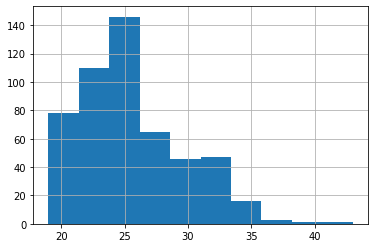

In [24]:
# Histograma
df_nba['Age'].hist()

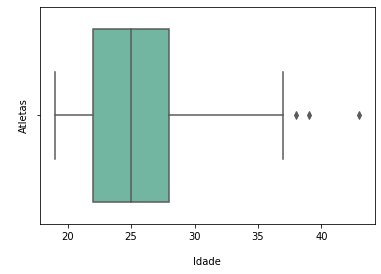

In [25]:
# BoxPlot
ax = sns.boxplot(x = df_nba['Age'], palette = "Set2", orient = "h")
plt.ylabel('\nAtletas')
plt.xlabel('\nIdade')
plt.show()

Claramente a idade média dos atletas é de 25 anos. E perceba que temos alguns outliers. Será que a variável idade segue uma distribuição normal? Vamos checar.

In [26]:
# Teste de normalidade com Pingouin
x = df_nba['Age']
pg.normality(x)

W          pval  normal
Age  0.949831  3.527059e-12   False

### Quais são os jogadores com maior número de pontos por jogo? Selecione os Top 10.

In [27]:
# Agrupando os dados por jogador e total de pontos
df_nba_top10 = df_nba.groupby(['Player'])['PTS'].sum().reset_index().rename(columns = {'PTS': 'Total_Pontos'})

In [28]:
# Retornamos os Top 10
df_nba_top10 = df_nba_top10.nlargest(10, 'Total_Pontos')

In [29]:
# Visualiza os dados
df_nba_top10

Player  Total_Pontos
212           James Harden          34.4
40            Bradley Beal          30.5
173  Giannis Antetokounmpo          29.6
473             Trae Young          29.6
87          Damian Lillard          28.9
320            Luka Dončić          28.7
424      Russell Westbrook          27.5
308           Kyrie Irving          27.4
278          Kawhi Leonard          26.9
22           Anthony Davis          26.7

### Quantos jogos os jogadores com 35 anos de idade ou mais iniciaram (variável GS)?

In [30]:
# Função
def lista_jogadores35():
    print('\nJogadores com 35 ou mais anos de idade e jogos disputados.\n')
    print('Jogador:          | Jogos:')
    print('------------------+--------')
    for index, row in df_nba.iterrows():
        if row['Age'] >= 35:
            print('{:<17} | {:>6}'.format(row['Player'], row['GS']))

In [31]:
# Executa a função
lista_jogadores35()


Jogadores com 35 ou mais anos de idade e jogos disputados.

Jogador:          | Jogos:
------------------+--------
Carmelo Anthony   |     50
J.J. Barea        |      4
Vince Carter      |      0
Tyson Chandler    |      5
Marc Gasol        |     35
Udonis Haslem     |      0
Andre Iguodala    |      0
LeBron James      |     60
Kyle Korver       |      0
J.J. Redick       |     35
Thabo Sefolosha   |      0


### Gráfico que mostra a relação entre rebotes ofensivos e minutos jogados. 

O que podemos concluir a partir do gráfico?

In [32]:
# Função
def gera_grafico_reb_ofensivos():
    plt.figure(figsize = [10,10])
    sns.set()
    sns.regplot(x = df_nba['MP'], y = df_nba['ORB'], color = '#AA2F2F', marker = '+')
    plt.xlabel('\nMinutos Jogados (por jogo)\n', fontsize = 14, color = 'black')
    plt.ylabel('\nRebotes Ofensivos (por jogo)\n', fontsize = 14, color = 'black')
    plt.title('\nMinutos Jogados x Rebotes Ofensivos\n', fontsize = 20)
    plt.show()

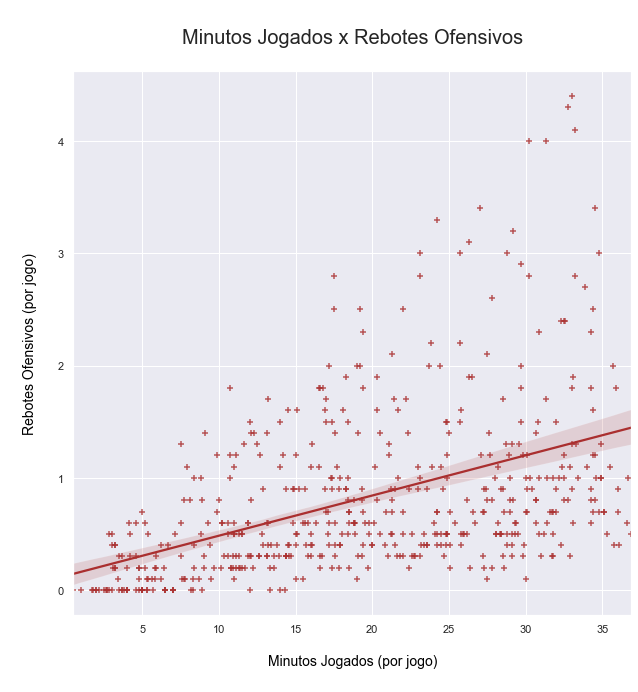

In [33]:
# Executa a função
gera_grafico_reb_ofensivos()

Aumenta a dispersão dos dados à media que aumenta o número de minutos jogados. Ou seja, com os jogadores mais cansados ao final do jogo é mais difícil fazer rebotes ofensivos.

Que tal criar um modelo de regressão linear e prever o total de rebotes ofensivos em determinado ponto do jogo? Parece legal? Então deixaremos isso com você!

### Gráfico que mostra a relação entre rebotes defensivos e minutos jogados. 

O que podemos concluir a partir do gráfico?

In [34]:
# Função
def gera_grafico_reb_defensivos():
    plt.figure(figsize = [10,10])
    sns.set()
    sns.regplot(x = df_nba['MP'], y = df_nba['DRB'], color = '#F244AA', marker = '*')
    plt.xlabel('\nMinutos Jogados (por jogo)\n', fontsize = 14, color = 'black')
    plt.ylabel('\nRebotes Defensivos (por jogo)\n', fontsize = 14, color = 'black')
    plt.title('\nMinutos Jogados x Rebotes Defensivos\n', fontsize = 20)
    plt.show()

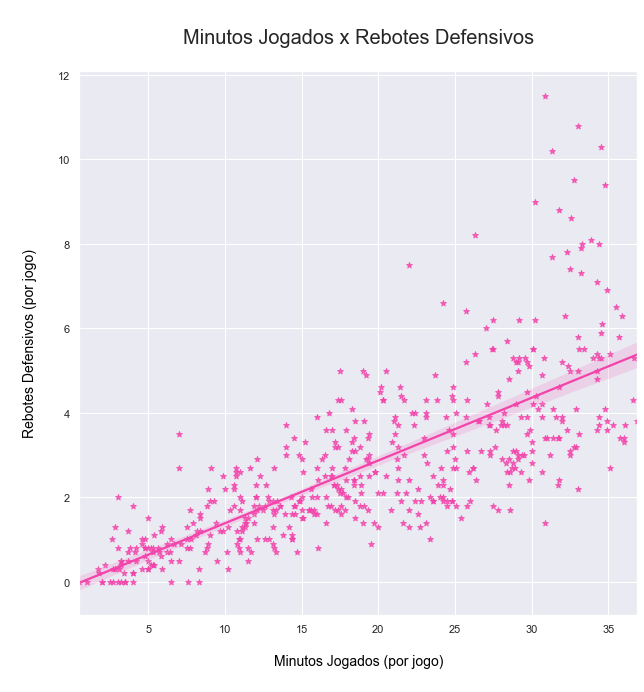

In [35]:
# Executa a função
gera_grafico_reb_defensivos()

O comportamento dos rebotes desensivos segue um padrão diferente dos rebotes ofensivos. Mais ao final do jogo, as equipes itensificam suas defesas e consequentemente aumenta o número de rebotes defensivos.

A adundância de dados disponíveis na NBA permite realizar uma infinidade de análises de todos os tipos. Aproveite esses dados e pratique seus skills.

# Fim